# Assignment 5 - Which animal gave us SARS?
## Secondary Title: Evolutionary Tree Construction

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np

import Assignment5_helper 

from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
# This is not relevant to most people because I recommended you use my server, but
# change home to where you are storing everything. Again. Not recommended.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Learning Outcomes
* Understand evolutionary trees and their uses in biology
* Apply, analyze, and evaluate evolutionary tree algorithms

## Into the algorithms

## Let's talk about a given graph and neighboring leaves

<center>
${\color{red}{d_{k,m}}} = \dfrac{({\color{purple}{d_{i,m}}} + {\color{red}{d_{k,m}}}) + ({\color{blue}{d_{j,m}}} + {\color{red}{d_{k,m}}}) - ({\color{purple}{d_{i,m}}} + {\color{blue}{d_{j,m}}})}{2} = \dfrac{d_{i,k} +d_{j,k} - d_{i,j}}{2}$

<img src="http://bioinformaticsalgorithms.com/images/Evolution/neighboring_leaves_equality.png" width=500>
</center>

**Exercise 1** Compute the distances between leaves in a weighted tree

Input: A weighted tree defined by the package networkx

Output: $n \times n$ matrix ($d_{i,j}$), where $d_{i,j}$ is the length of the path between leaves $i$ and $j$.

Learning objectives:
1. Refresh memory of graph traversal (path finding)
2. Understand the difference between $d_{i,j}$ and $D_{i,j}$.
3. Gain exposure and work with networkx python package.

In [14]:
d=Assignment5_helper.compute_d(Assignment5_helper.G)
d

,v1,v2,v3,v4,v5,v6
v1,0,13,21,22,11,15
v2,13,0,12,13,2,6
v3,21,12,0,13,10,6
v4,22,13,13,0,11,7
v5,11,2,10,11,0,4
v6,15,6,6,7,4,0


**Exercise 2** Implement limb length algorightm described in Chapter 7.

Input: An addititve distance matrix $D$ and a node $j$

Output: The length of the limb connect leaf $j$ to its parent in $Tree(D)$.

Learning outcomes:
1. Understanding why this function is needed when we just computed the paths weights previously.
2. Understanding the Limb Length Theorem in Chapter 7.

In [15]:
length = Assignment5_helper.limb(Assignment5_helper.D,"v4")
length

0.0

**Exercise 3** Implement a portion of ``AdditivePhylogeny`` algorithm from Chapter 7.

Input: Distance matrix $D$ and node name $n$.

Output: Return the node names $i,k$ that satisfy $D_{i,k} = D_{i,n} + D_{n,k}$. In other words, where can you insert $n$ back in.

In [16]:
D=Assignment5_helper.D
print("Starting D")
print(D)
limbLength = Assignment5_helper.limb(D,D.index[-1]) # our algorithm will choose the last node
n = D.index[-1]
print("Node to remove:",n)
Dtrimmed = D.drop(n).drop(n,axis=1)
for j in Dtrimmed.index:
    D.loc[j,n] = D.loc[j,n] - limbLength
    D.loc[n,j] = D.loc[j,n]
print("New D")
print(D)
i,k = Assignment5_helper.find(D,"v4")
i,k

Starting D
      v1    v2    v3    v4
v1   0.0  13.0  21.0  15.0
v2  13.0   0.0  12.0   6.0
v3  21.0  12.0   0.0   6.0
v4  15.0   6.0   6.0   0.0
Node to remove: v4
New D
      v1    v2    v3    v4
v1   0.0  13.0  21.0  15.0
v2  13.0   0.0  12.0   6.0
v3  21.0  12.0   0.0   6.0
v4  15.0   6.0   6.0   0.0


('v1', 'v3')

**Exercise 4** Implement a portion of ``AdditivePhylogeny`` algorithm from Chapter 7. The base case when there are only two nodes.

Input: Distance matrix $D$ of size $2 \times 2$.

Output: Return a networkx graph with the correct weight.

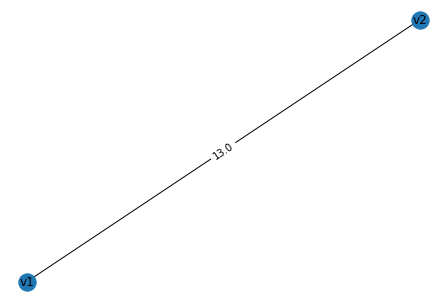

In [17]:
base_G = Assignment5_helper.base_case(D.iloc[:2,:].iloc[:,:2])
Assignment5_helper.show(base_G)

**Exercise 5:** We are ready to put everything together! Implement the full additive phylogeny algorithm from Chapter 7. 

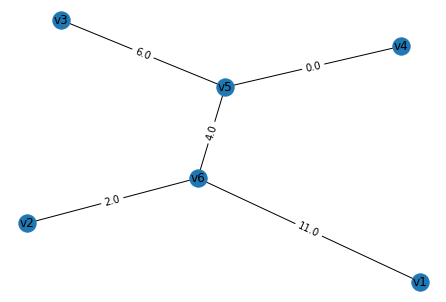

In [18]:
G2 = Assignment5_helper.additive_phylogeny(D,len(D)+1)
Assignment5_helper.show(G2)

**Exercise 6** Run your new algorithm on SARS data derived from multiple alignment of Spike proteins.

In [19]:
import os.path

file = f'{home}/csc-448-student/data/coronavirus_distance_matrix_additive.txt'
print('Opening',file)
D_sars = pd.read_csv(file,index_col=0)
D_sars

Opening /home/jupyter-pander14/csc-448-student/data/coronavirus_distance_matrix_additive.txt


,Cow,Pig,Horse,Mouse,Dog,Cat,Turkey,Civet,Human
Cow,0,295,306,497,1081,1091,1003,956,954
Pig,295,0,309,500,1084,1094,1006,959,957
Horse,306,309,0,489,1073,1083,995,948,946
Mouse,497,500,489,0,1092,1102,1014,967,965
Dog,1081,1084,1073,1092,0,818,1056,1053,1051
Cat,1091,1094,1083,1102,818,0,1066,1063,1061
Turkey,1003,1006,995,1014,1056,1066,0,975,973
Civet,956,959,948,967,1053,1063,975,0,16
Human,954,957,946,965,1051,1061,973,16,0


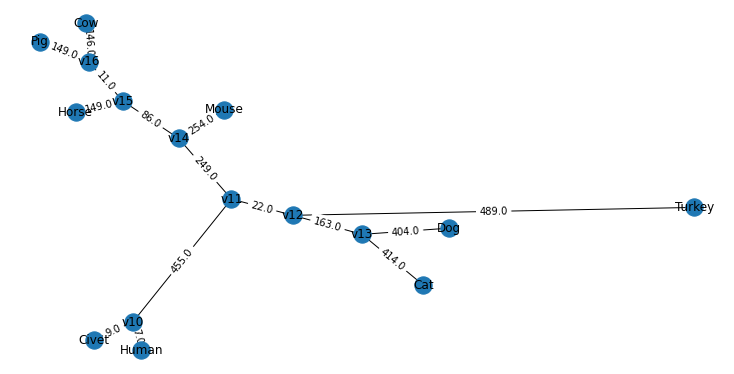

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

G3 = Assignment5_helper.additive_phylogeny(D_sars,len(D_sars)+1)
Assignment5_helper.show(G3)

In [21]:
Assignment5_helper.show_adj(G3)

,Cow,Pig,v16,Horse,v15,Mouse,v14,Dog,v13,Cat,v12,Turkey,v11,Civet,v10,Human
Cow,0.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pig,0.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v16,146.0,149.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Horse,0.0,0.0,0.0,0.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v15,0.0,0.0,11.0,149.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mouse,0.0,0.0,0.0,0.0,0.0,0.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v14,0.0,0.0,0.0,0.0,86.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,0.0,0.0,0.0
Dog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
v13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404.0,0.0,414.0,163.0,0.0,0.0,0.0,0.0,0.0
Cat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Helper function to help you check your algorithms**

In [22]:
Assignment5_helper.compute_path_cost(G3,'Human','Turkey')

973.0

In [23]:
Assignment5_helper.compute_path_cost(G3,'Human','Turkey') == D_sars.loc['Human','Turkey']

True

In [24]:
# Don't forget to push!